
All right, serial port now open. Configuration:

Serial<id=0x19816ff6a90, open=True>(port='COM3', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=10, xonxoff=False, rtscts=False, dsrdtr=False) 



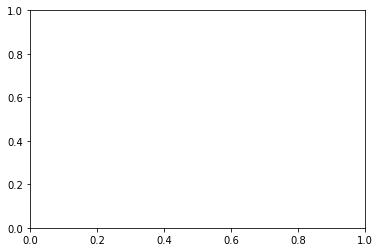

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import numpy as np
import random
import serial

#initialize serial port
ser = serial.Serial()
ser.port = 'COM3' #Arduino serial port
ser.baudrate = 115200
ser.timeout = 10 #specify timeout when using readline()
ser.open()
if ser.is_open==True:
	print("\nAll right, serial port now open. Configuration:\n")
	print(ser, "\n") #print serial parameters

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = [] #store trials here (n)
ys = [] #store relative frequency here
rs = [] #for theoretical probability

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    #Aquire and parse data from serial port
    line=ser.readline()      #ascii
    line_as_list = line.split(b',')
    i = int(line_as_list[0])
    relProb = line_as_list[1]
    relProb_as_list = relProb.split(b'\n')
    relProb_float = float(relProb_as_list[0])
	
	# Add x and y to lists
    xs.append(i)
    ys.append(relProb_float)
    rs.append(0.5)

    # Limit x and y lists to 20 items
    #xs = xs[-20:]
    #ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys, label="Experimental Probability")
    ax.plot(xs, rs, label="Theoretical Probability")

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('This is how I roll...')
    plt.ylabel('Relative frequency')
    plt.legend()
    plt.axis([1, None, 0, 1.1]) #Use for arbitrary number of trials
    #plt.axis([1, 100, 0, 1.1]) #Use for 100 trial demo

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()

['0.00', '0.00', '0.00', '0.00', '0.00', '0.00\r\n']


<IPython.core.display.Javascript object>


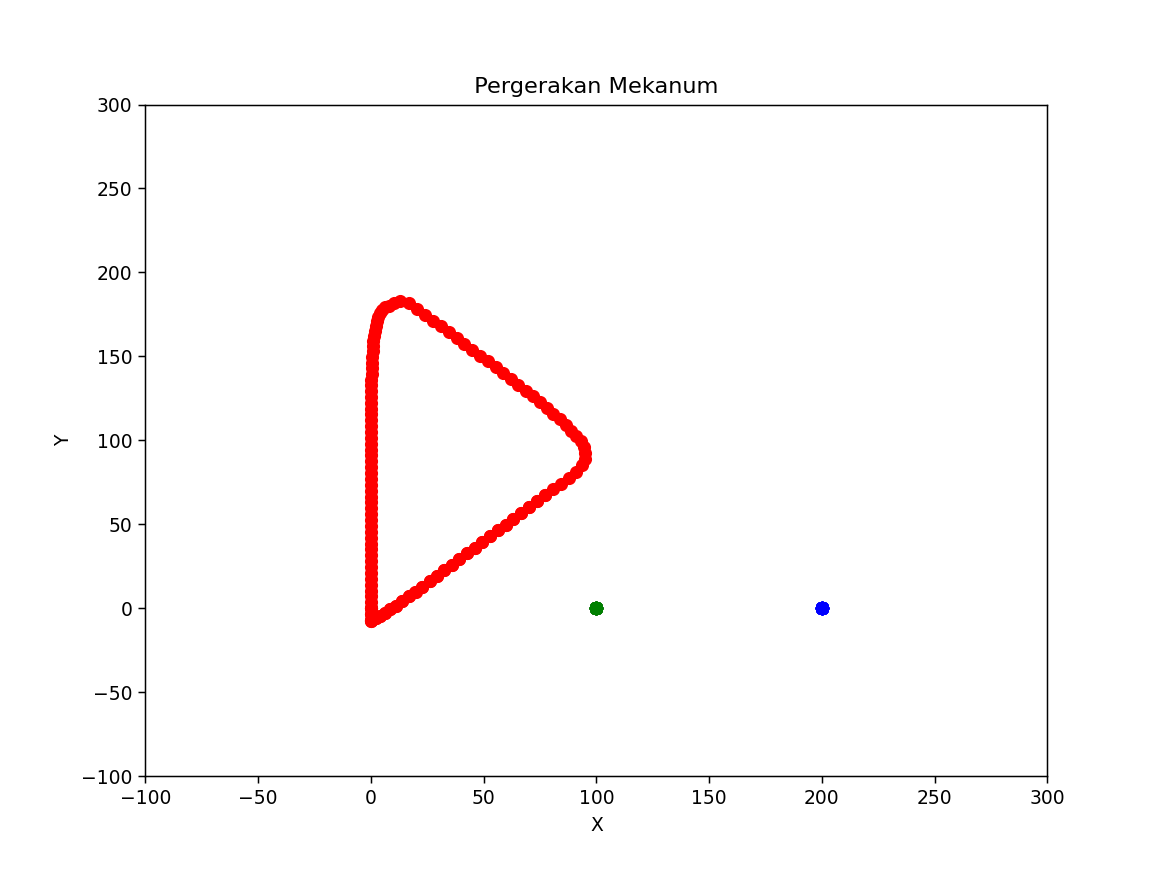

['0.00', '-35.13', '0.00', '0.00', '0.00', '0.00\r\n']
['0.14', '-34.99', '0.00', '0.00', '0.00', '0.00\r\n']
['0.29', '-3.43', '0.00', '0.00', '0.00', '0.00\r\n']
['8.57', '10.28', '0.00', '0.00', '0.00', '0.00\r\n']
['15.14', '4.28', '0.00', '0.00', '0.00', '0.00\r\n']
['16.71', '11.57', '0.00', '0.00', '0.00', '0.00\r\n']
['19.99', '20.28', '0.00', '0.00', '0.00', '0.00\r\n']
['24.28', '20.85', '0.00', '0.00', '0.00', '0.00\r\n']
['26.42', '21.85', '0.00', '0.00', '0.00', '0.00\r\n']
['26.70', '26.42', '0.00', '0.00', '0.00', '0.00\r\n']
['29.27', '27.85', '0.00', '0.00', '0.00', '0.00\r\n']
['30.27', '28.85', '0.00', '0.00', '0.00', '0.00\r\n']
['30.70', '30.13', '0.00', '0.00', '0.00', '0.00\r\n']
['31.56', '31.56', '0.00', '0.00', '0.00', '0.00\r\n']
['32.27', '32.27', '0.00', '0.00', '0.00', '0.00\r\n']
['32.84', '32.84', '0.00', '0.00', '0.00', '0.00\r\n']
['33.13', '33.13', '0.00', '0.00', '0.00', '0.00\r\n']
['33.56', '33.56', '0.00', '0.00', '0.00', '0.00\r\n']
['33.70', '33

In [34]:
import serial
import time
import matplotlib . pyplot as plt
from drawnow import *
%matplotlib notebook

ser = serial.Serial ('COM3', 115200 , timeout =1)
time.sleep (2)

def makeFig () :
    plt.plot ( pathX_Red, pathY_Red, 'ro-')
    plt.plot ( pathX_Green, pathY_Green, 'go-')
    plt.plot ( pathX_Blue, pathY_Blue, 'bo-')
    plt.xlabel ('X')
    plt.ylabel ('Y')
    plt.title (' Pergerakan Mekanum ')
    plt.xlim([-100, 300])
    plt.ylim([-100, 300])
    plt.show()
    
pathX_Red = [0] # posisi awal mecanum
pathY_Red = [0]
pathX_Green = [100]
pathY_Green = [0]
pathX_Blue = [200]
pathY_Blue = [0]

for i in range (150) :
    line = ser.readline () # read a byte string
    if line :
        string = line.decode () # convert the byte string to a unicode string
        line_as_list = string.split("\t")
        print(line_as_list)
        deltaX_Red = float(line_as_list[0])/10
        deltaY_Red = float(line_as_list[1])/10
        deltaX_Green = float(line_as_list[2])/10
        deltaY_Green = float(line_as_list[3])/10
        deltaX_Blue = float(line_as_list[4])/10
        deltaY_Blue = float(line_as_list[5])/10
        
        pathY_Red.append ( deltaY_Red + pathY_Red[-1] )
        pathX_Red.append ( deltaX_Red + pathX_Red[-1] ) # add int to data list
        pathY_Green.append ( deltaY_Green + pathY_Green[-1] )
        pathX_Green.append ( deltaX_Green + pathX_Green[-1] ) # add int to data list
        pathY_Blue.append ( deltaX_Blue + pathY_Blue[-1] )
        pathX_Blue.append ( deltaX_Blue + pathX_Blue[-1] ) # add int to data list
        
        
        drawnow ( makeFig ) # Call drawnow to update our live
        plt.pause (.000001)
ser.close ()